In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
# Download some digit images from MNIST dataset
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_0.jpg" -O "mnist_0.jpg"
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_1.jpg" -O "mnist_1.jpg"

In [4]:
print(f'torch version: {torch.__version__}')

torch version: 2.7.1+cu126


## 1. Converting Images to Batched tensors

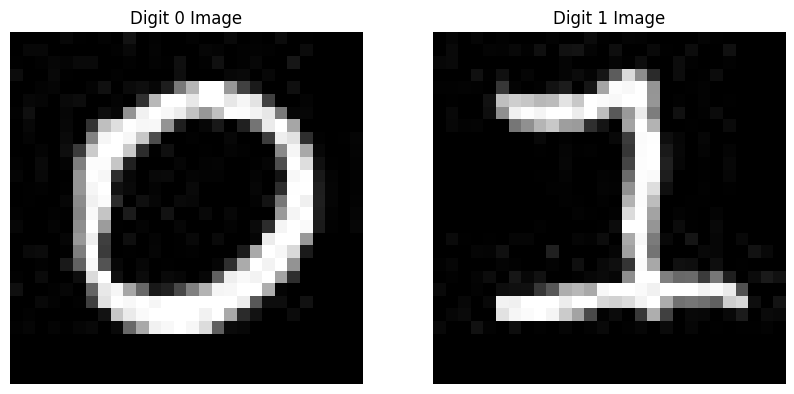

In [5]:
digit_0_array_og = cv2.imread('mnist_0.jpg')
digit_1_array_og = cv2.imread('mnist_1.jpg')

digit_0_array_gray = cv2.imread('mnist_0.jpg', cv2.IMREAD_GRAYSCALE)
digit_1_array_gray = cv2.imread('mnist_1.jpg', cv2.IMREAD_GRAYSCALE)

# Visualize the images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(digit_0_array_gray, cmap='gray', interpolation='none')
ax[0].set_title('Digit 0 Image')
ax[0].axis('off')

ax[1].imshow(digit_1_array_gray, cmap='gray', interpolation='none')
ax[1].set_title('Digit 1 Image')
ax[1].axis('off')
plt.show()

In [6]:
# Numpy array of the image
print(f"Image shape: {digit_0_array_og.shape}")
print(f"Max pixel value: {np.max(digit_0_array_og)}, Min pixel value: {np.min(digit_0_array_og)}")

Image shape: (28, 28, 3)
Max pixel value: 255, Min pixel value: 0


In [7]:
digit_0_array_gray

array([[  0,   0,   0,   0,   7,   1,   0,   3,   0,  18,   0,   3,   0,
          0,   3,   0,   0,   9,   0,   2,   0,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   7,   7,   0,   0,   0,   0,   0,   2,   8,   0,   4,   0,
          0,   0,   6,   4,   0,   2,   3,   2,   0,   0,  11,   0,   0,
          0,   0],
       [  1,   0,   2,   6,   4,   9,   9,   0,   0,   2,   0,   3,   1,
         15,   0,   2,  16,   0,   2,   7,   0,   0,  22,   0,   0,   0,
          0,   0],
       [ 12,   0,   0,   8,   1,   0,   0,   0,   2,   0,   0,   0,   0,
         14,   0,   0,   0,   7,   9,   0,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   3,   5,   0,   0,   4,  16,   0,  10,  14,   6,  29,
        122, 182, 255, 255, 152,  66,  26,   0,   0,  15,   0,   0,   0,
          0,   0],
       [  0,   7,   5,   0,   9,  12,   0,   0,   4,   0,  49, 184, 255,
        255, 232, 255, 255, 231, 246, 227,  64,   0,   0,   4,   0,   0,
          0,   0],
       [  

### 1.1. Convert Numpy array to Torch tensors

Shape of image tensor 0: torch.Size([28, 28, 3])
Normalised Min pixel value: 0.0, Normalisex Max pixel value: 1.0


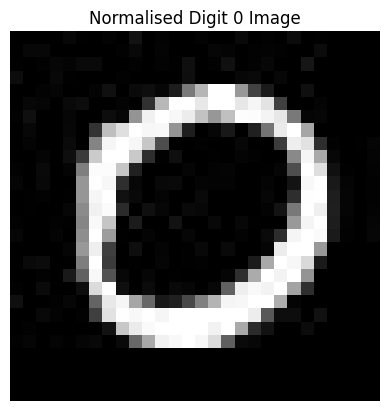

In [8]:
image_tensor_0 = torch.tensor(digit_0_array_og, dtype=torch.float32) / 255.0
image_tensor_1 = torch.tensor(digit_1_array_og, dtype=torch.float32) / 255.0

print("Shape of image tensor 0:", image_tensor_0.shape)
print(f"Normalised Min pixel value: {torch.min(image_tensor_0)}, Normalisex Max pixel value: {torch.max(image_tensor_1)}")

plt.imshow(image_tensor_0, cmap='gray')
plt.title("Normalised Digit 0 Image")
plt.axis('off')
plt.show()

### 1.2. Creating Input Batch

In [9]:
batch_tensor = torch.stack([image_tensor_0, image_tensor_1], dim=0)
print('Batch tensor shape:', batch_tensor.shape)

Batch tensor shape: torch.Size([2, 28, 28, 3])


Additionally in PyTorch, image tensors typically follow the shape convention [N ,C ,H ,W] unlike tensorflow which follows [N, H, W, C].

Therefore, we need to bring the color channel to the second dimension. This can be achieved using either torch.view() or torch.permute().

In [10]:
batch_tensor = batch_tensor.permute(0, 3, 1, 2)
print('Batch tensor shape after permute:', batch_tensor.shape)

Batch tensor shape after permute: torch.Size([2, 3, 28, 28])


## 2. Introduction to Tensors and its Operations

### 2.1 Let's construct a tensor

In [11]:
a = torch.ones([5])
print(f'a: {a}, shape: {a.shape}, dtype: {a.dtype}')

b = torch.ones([1, 5], )
print(f'b: {b}, row_vecotor shape: {b.shape}, dtype: {b.dtype}')

c = torch.ones([5, 1])
print(f'c: {c}, col_vector shape: {c.shape}, dtype: {c.dtype}')


a: tensor([1., 1., 1., 1., 1.]), shape: torch.Size([5]), dtype: torch.float32
b: tensor([[1., 1., 1., 1., 1.]]), row_vecotor shape: torch.Size([1, 5]), dtype: torch.float32
c: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]), col_vector shape: torch.Size([5, 1]), dtype: torch.float32


In [12]:
d = torch.tensor([[1., 2, 3], [4, 5, 6]])
display(d)
display(d.shape)
display(f'{d.ndim} dimensional tensor')

tensor([[1., 2., 3.],
        [4., 5., 6.]])

torch.Size([2, 3])

'2 dimensional tensor'

In [13]:
e = torch.tensor([[[1, 2], [3, 4]], [[5, 6],[7, 8]]])
display(e)
display(e.shape)
display(f'{e.ndim} dimensional tensor')

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

torch.Size([2, 2, 2])

'3 dimensional tensor'

### 2.2. Access an element in Tensor

In [14]:
print(e[1][0])
print(e[1, 0])  # This is a more concise way to access the same element
print(e[1, 0, 1])  # Accessing the second element of the first row of the second matrix

tensor([5, 6])
tensor([5, 6])
tensor(6)


In [15]:
e[0, 1]

tensor([3, 4])

### 2.3 Specify data types

In [16]:
int_tensor = torch.tensor([[5, 1], [2, 4]], dtype=torch.int64)
float_tensor = torch.tensor([[5., 1], [2, 4]], dtype=torch.float64)

In [17]:
int_tensor.dtype, float_tensor.dtype

(torch.int64, torch.float64)

In [18]:
print(f'int_tensor.dtype: {int_tensor.dtype}')
print(f'int_tensor: {int_tensor}')
# convert int_tensor to float
float_tensor_converted = int_tensor.to(torch.float64)
print("Converted float tensor:", float_tensor_converted)

int_tensor.dtype: torch.int64
int_tensor: tensor([[5, 1],
        [2, 4]])
Converted float tensor: tensor([[5., 1.],
        [2., 4.]], dtype=torch.float64)


### 2.4. Tensor to/from NumPy Array

In [19]:
d_numpy = d.numpy()
print("Numpy array from tensor d:", d_numpy)

# Convert numpy array back to tensor
h = np.array([[1,2], [3, 4]])

h_tensor = torch.from_numpy(h)
print("Tensor from numpy array h:", h_tensor)

Numpy array from tensor d: [[1. 2. 3.]
 [4. 5. 6.]]
Tensor from numpy array h: tensor([[1, 2],
        [3, 4]])


### 2.5. Arithmetic Operations on Tensors

In [20]:
# Create tensor
tensor_1 = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor_2 = torch.tensor([[1, 2, 3], [-4, 5, 6]])

# Addition 
print(f'Tensor addition: \n{tensor_1 + tensor_2}\n')
print(f'Tensor addition using add: \n{torch.add(tensor_1, tensor_2)}\n')

# Subtraction
print(f'Tensor Subtraction: \n{tensor_1 - tensor_2}\n')
print(f"Tensor subtraction using sub: \n{torch.sub(tensor_1, tensor_2)}\n")

# Multiplication
print(f'Tensor Multiplication with scalar: \n{tensor_1 *3}\n')
print(f"Tensor Multiplication with scalar using mul: \n{torch.mul(tensor_1, 3)}\n")
# Element-wise multiplication
print(f'Tensor Element-wise Multiplication: \n{tensor_1 * tensor_2}\n')
print(f'Tensor Element-wise Multiplication usign mul: \n{torch.mul(tensor_1, tensor_2)}\n')

# Division
print(f'Tensor Division with scalar: \n{tensor_1 / 3}\n')
print(f'Tensor Division with scalar using div: \n{torch.div(tensor_1, 3)}\n')
# Element-wise division
print(f'Tensor Element-wise Division: \n{tensor_1 / tensor_2}\n')
print(f'Tensor Element-wise Division using div: \n{torch.div(tensor_1, tensor_2)}\n')

Tensor addition: 
tensor([[ 2,  4,  6],
        [ 0, 10, 12]])

Tensor addition using add: 
tensor([[ 2,  4,  6],
        [ 0, 10, 12]])

Tensor Subtraction: 
tensor([[0, 0, 0],
        [8, 0, 0]])

Tensor subtraction using sub: 
tensor([[0, 0, 0],
        [8, 0, 0]])

Tensor Multiplication with scalar: 
tensor([[ 3,  6,  9],
        [12, 15, 18]])

Tensor Multiplication with scalar using mul: 
tensor([[ 3,  6,  9],
        [12, 15, 18]])

Tensor Element-wise Multiplication: 
tensor([[  1,   4,   9],
        [-16,  25,  36]])

Tensor Element-wise Multiplication usign mul: 
tensor([[  1,   4,   9],
        [-16,  25,  36]])

Tensor Division with scalar: 
tensor([[0.3333, 0.6667, 1.0000],
        [1.3333, 1.6667, 2.0000]])

Tensor Division with scalar using div: 
tensor([[0.3333, 0.6667, 1.0000],
        [1.3333, 1.6667, 2.0000]])

Tensor Element-wise Division: 
tensor([[ 1.,  1.,  1.],
        [-1.,  1.,  1.]])

Tensor Element-wise Division using div: 
tensor([[ 1.,  1.,  1.],
        [

### 2.6 Broadcasting

 - `a` is a 1-dimensional tensor with shape \([ 3 ]\).
 - `b` is a scalar tensor with shape \([ 1 ]\).
 - When adding `a` and `b`, PyTorch broadcasts `b` to match the shape of `a`, resulting in \([ 1 + 4, 2 + 4, 3 + 4 ]\).

In [23]:
# Create 2 1D tensors

tensor_a = torch.tensor([1, 2, 3])

tensor_b = torch.tensor([[4,], [5,], [6]])

result = torch.add(tensor_a, tensor_b)

print("Shape: ", result.shape)
print("\n")
print(f'Broadcasting result: \n{result}')

Shape:  torch.Size([3, 3])


Broadcasting result: 
tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])


[Broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html#broadcasting-semantics) allows PyTorch to perform element-wise operations on tensors of
   - `a` is a 2-dimensional tensor with shape \([1, 3]\).
   - `b` is a 2-dimensional tensor with shape \([3, 1]\).
   - When adding `a` and `b`, PyTorch broadcasts both tensors to the common shape \([3, 3]\), resulting in:
   
$$
\begin{bmatrix}
1+4 & 2+4 & 3+4 \\
1+5 & 2+5 & 3+5 \\
1+6 & 2+6 & 3+6 \\
\end{bmatrix}
$$




### 2.7. CPU v/s GPU Tensor

In [25]:
tensor_cpu = torch.tensor([[1., 2], [3, 4], [5, 6]], device='cpu')

tensor_gpu = torch.tensor([[1., 2], [3, 4], [5, 6]], device='cuda')

Just like tensor creation, the operations performed for CPU and GPU tensors are also different and consume RAM corresponding to the device specified.

In [28]:
tensor_cpu = tensor_cpu * 5 # This uses the CPU RAM

tensor_gpu = tensor_gpu * 5 # This uses the GPU RAM
print(f'Tensor on CPU: \n{tensor_cpu}\n')
print(f'Tensor on GPU: \n{tensor_gpu}')
# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available. Using GPU.")
    device = torch.device("cuda")
else:
    print("CUDA is not available. Using CPU.")
    device = torch.device("cpu")

Tensor on CPU: 
tensor([[125., 250.],
        [375., 500.],
        [625., 750.]])

Tensor on GPU: 
tensor([[125., 250.],
        [375., 500.],
        [625., 750.]], device='cuda:0')
CUDA is available. Using GPU.


In [31]:
# We can move tensors to the GPU and vice versa
tensor_gpu_cpu = tensor_gpu.to('cpu')
print(f'Tensor moved to {'cpu'}: \n{tensor_gpu_cpu}')
# Check if the tensor is on GPU
print(f'Is tensor_gpu_cpu on GPU? {tensor_gpu_cpu.is_cuda}')
# Check if the tensor is on CPU
print(f'Is tensor_gpu_cpu on CPU? {tensor_gpu_cpu.is_cpu}')
print(f'Tensor on CPU: \n{tensor_gpu_cpu}\n\n')

tensor_cpu_gpu = tensor_cpu.to('cuda')
print(f'Tensor moved to {'cuda'}: \n{tensor_cpu_gpu}')
# Check if the tensor is on GPU
print(f'Is tensor_cpu_gpu on GPU? {tensor_cpu_gpu.is_cuda}')
# Check if the tensor is on CPU
print(f'Is tensor_cpu_gpu on CPU? {tensor_cpu_gpu.is_cpu}')
# Check if the tensor is on GPU
print(f'Tensor on GPU: \n{tensor_cpu_gpu}')

Tensor moved to cpu: 
tensor([[125., 250.],
        [375., 500.],
        [625., 750.]])
Is tensor_gpu_cpu on GPU? False
Is tensor_gpu_cpu on CPU? True
Tensor on CPU: 
tensor([[125., 250.],
        [375., 500.],
        [625., 750.]])


Tensor moved to cuda: 
tensor([[125., 250.],
        [375., 500.],
        [625., 750.]], device='cuda:0')
Is tensor_cpu_gpu on GPU? True
Is tensor_cpu_gpu on CPU? False
Tensor on GPU: 
tensor([[125., 250.],
        [375., 500.],
        [625., 750.]], device='cuda:0')


# 3. Conclusion


In this notebook, we started with constructing simple tensors and manipulating them. Next notebook, we will understand the functionality of Torch Autograd and its role in automatic differentiation and gradient computation.
In the upcoming notebooks, we will go deeper into backpropagation and various computer vision tasks such as Classification, Segmentation, Object Detection, and Instance Segmentation. Each notebook will provide a detailed explanation and hands-on examples to help you serve as starter notebooks to master the essential tasks in computer vision.